In [4]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#import skill_metrics as sm
#import pickle
from matplotlib import rcParams


In [24]:
def rmse(x, y,axis):
    return np.sqrt(((x - y) ** 2).mean(axis=axis))
def corr(x,y,dim):
    return xr.corr(x,y,dim)

In [5]:
bd12 = xr.open_dataset('../../data/BD12profiledata/bd12_ts_mar_2012_to_feb_2017.nc')
bd12
oras = xr.open_dataset('ts_oras5_1993_2018_BD12.nc')
oras
s_god = xr.open_dataset('salt_godas_1980_2020.nc')
#s_god.saltydsl
t_god = xr.open_dataset('temp_godas_1980_2020.nc')
#t_god.potdsl

In [1]:
from xarrayutils.utils import mask_mixedlayer



In [16]:
a=mask_mixedlayer(bd12,bd12.temp,z_dim='dep',mask='inside')

In [24]:
a.temp[:,0:7].isel(**roi).plot.contourf(y='dep')

NameError: name 'roi' is not defined

In [39]:
bd12.time
time = slice("2012-03-01","2017-02-28")

t_oras = oras.thetao.sel(time=time).interp(depth=bd12.dep)
s_oras = oras.so.sel(time=time).interp(depth=bd12.dep)
t_godas = t_god.potdsl.sel(time=time).interp(lev=bd12.dep) - 273.15
s_godas = s_god.saltydsl.sel(time=time).interp(lev=bd12.dep)*1000
t_obs = bd12.temp.resample(time='1M').mean()
s_obs = bd12.salt.resample(time='1M').mean()

In [77]:
#corr(t_obs,t_oras[:,:,0,0],'time')
for m in range(11):
    cr1 = xr.corr(xr.DataArray(t_obs[:,m].data),xr.DataArray(t_oras[:,m,0,0].data))
    cr2 = xr.corr(xr.DataArray(s_obs[:,m].data),xr.DataArray(s_oras[:,m,0,0].data))
    cr3 = xr.corr(xr.DataArray(t_obs[:,m].data),xr.DataArray(t_godas[:,m,0,0].data))
    cr4 = xr.corr(xr.DataArray(s_obs[:,m].data),xr.DataArray(s_godas[:,m,0,0].data))
    if m == 0:
        tcror = cr1
        scror = cr2
        tcrgd = cr3
        scrgd = cr4
    else:
        tcror = np.vstack((tcror,cr1))
        scror = np.vstack((scror,cr2))
        tcrgd = np.vstack((tcrgd,cr3))
        scrgd = np.vstack((scrgd,cr4))
#cor = xr.DataArray(cor[:,0],dims=['depth'],coords=dict(depth=(['depth'],bd12.dep.data)))
cor=xr.Dataset({'tcror':(['depth'],tcror[:,0]),
               'scror':(['depth'],scror[:,0]),
               'tcrgd':(['depth'],tcrgd[:,0]),
               'scrgd':(['depth'],scrgd[:,0])},
              coords={'depth':bd12.dep.data})
cor

<xarray.Dataset>
Dimensions:  (depth: 11)
Coordinates:
  * depth    (depth) float64 1.0 5.0 10.0 15.0 20.0 ... 75.0 100.0 200.0 500.0
Data variables:
    tcror    (depth) float64 0.9698 0.9218 0.979 0.9793 ... 0.8377 0.648 0.03898
    scror    (depth) float64 0.5724 -0.3405 0.4883 ... 0.0481 0.07581 -0.4396
    tcrgd    (depth) float64 nan 0.9065 0.9575 0.9519 ... 0.4211 0.4648 0.1314
    scrgd    (depth) float64 0.1536 -0.312 0.2635 ... 0.3837 -0.3492 0.06317

(200.0, 0.0)

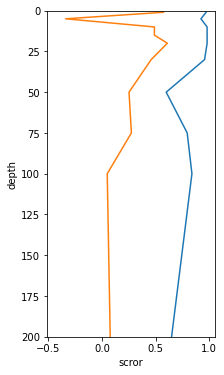

In [98]:
fig, ax = plt.subplots(figsize=(3,6))
#cor.tcrgd.plot(y='depth')
cor.tcror.plot(y='depth')
#cor.scrgd.plot(y='depth')
cor.scror.plot(y='depth')
plt.ylim(200,0)

In [99]:
bd12 = xr.open_dataset('../../data/BD12profiledata/bd12_tsuv_mar2012_jul2019.nc')
oras = xr.open_dataset('ts_oras5_1993_2018_BD12.nc')


<xarray.DataArray 'temp' (time: 89, dep1: 11)>
array([[        nan,         nan, 29.12650659, 29.07556935, 28.98587325,
        28.7470879 , 28.06486304, 25.70830538, 20.94851411, 13.30280484,
        10.02307863],
       [        nan, 30.160904  , 30.18957756, 30.09027377, 29.92673899,
        29.4809202 , 28.36312609, 25.90602925, 22.36445632, 13.3012256 ,
         9.73731542],
       [        nan, 29.78566529, 29.77449691, 29.76249261, 29.72288763,
        29.5350129 , 28.56294435, 25.96186008, 22.1872082 , 13.70833253,
         9.93627366],
       [        nan, 28.78806137, 28.77446111, 28.74863972, 28.70610375,
        28.53924   , 27.60639222, 24.67081583, 21.65933083, 13.67294417,
        10.23348875],
       [        nan, 28.55275309, 28.55048387, 28.54551747, 28.52878911,
        28.36915887, 26.89797366, 23.8722754 , 21.03959409, 13.29724153,
        10.13146304],
       [        nan, 28.48442673, 28.47996707, 28.47142742, 28.45052245,
        28.32995323, 27.4910711 , 25.20231331, 21.98744167, 13.91662473,
        10.2510871 ],
       [        nan, 28.00863987, 28.00827917, 28.01616014, 28.02766972,
        28.03268333, 27.54884569, 24.91799486, 21.13176764, 13.34039042,
...
        28.60447056, 27.8963746 , 25.18645645, 21.62396102, 13.79796505,
         9.82034247],
       [29.00077068, 28.95745967, 28.92097649, 28.89015238, 28.83497202,
        28.67130164, 28.09378646, 25.08834092, 20.85504926, 12.70426949,
         9.8579619 ],
       [29.68149931, 29.59387569, 29.51987099, 29.43945345, 29.33331685,
        28.97953076, 27.70538662, 24.09993145, 19.79009876, 12.65032869,
         9.63601738],
       [31.10767722, 31.01432694, 30.96230431, 30.91042861, 30.77318014,
        29.96568792, 26.50560181, 21.88838222, 18.54014292, 12.37342819,
         9.74767708],
       [30.31028508, 30.29320672, 30.27557151, 30.2408289 , 30.17200941,
        29.71023616, 27.21427823, 23.77054677, 20.58452594, 13.58905524,
         9.74472527],
       [29.66256417, 29.64914319, 29.63877639, 29.63151069, 29.62045139,
        29.52400833, 28.07327361, 25.14352708, 21.56433222, 13.75288361,
        10.03303069],
       [29.27883782, 29.26863842, 29.25525127, 29.24612138, 29.23783513,
        29.20616741, 28.55439776, 25.5573997 , 22.40117025, 14.54407205,
        10.1679417 ]])
Coordinates:
  * time     (time) datetime64[ns] 2012-03-31 2012-04-30 ... 2019-07-31
  * dep1     (dep1) int64 1 5 10 15 20 30 50 75 100 200 500

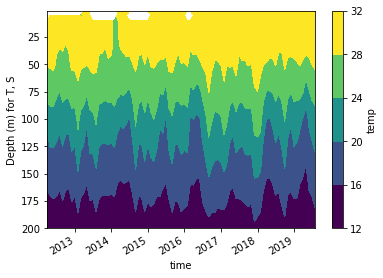

In [108]:
bd12.temp.resample(time='1M').mean().sel(dep1=slice(1,200)).plot.contourf(y='dep1',yincrease=False)
bd12.temp.resample(time='1M').mean()

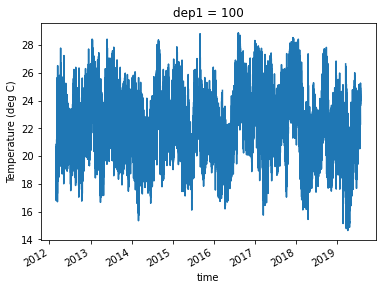

In [10]:
bd12.temp.sel(dep1=100).plot()

In [11]:
temp = bd12.temp.resample(time='1M').mean('time').sel(time=slice("2012-03-01","2018-12-31"))
salt = bd12.salt.resample(time='1M').mean('time').sel(time=slice("2012-03-01","2018-12-31"))


In [12]:
t_or = oras.thetao[:,:,0,0].resample(time='1M').mean('time').sel(time=slice("2012-03-01","2018-12-31")).interp(depth=bd12.dep1)
s_or = oras.so[:,:,0,0].resample(time='1M').mean('time').sel(time=slice("2012-03-01","2018-12-31")).interp(depth=bd12.dep1)


# Taylor diagram

In [31]:
stats10 = sm.taylor_statistics(temp.sel(dep1=10).data,t_or.sel(dep1=10).data)
stats15 = sm.taylor_statistics(temp.sel(dep1=15).data,t_or.sel(dep1=15).data)
stats20 = sm.taylor_statistics(temp.sel(dep1=20).data,t_or.sel(dep1=20).data)
stats30 = sm.taylor_statistics(temp.sel(dep1=30).data,t_or.sel(dep1=30).data)
stats50 = sm.taylor_statistics(temp.sel(dep1=50).data,t_or.sel(dep1=50).data)
stats75 = sm.taylor_statistics(temp.sel(dep1=75).data,t_or.sel(dep1=75).data)
stats100 = sm.taylor_statistics(temp.sel(dep1=100).data,t_or.sel(dep1=100).data)
stats200 = sm.taylor_statistics(temp.sel(dep1=200).data,t_or.sel(dep1=200).data)
stats500 = sm.taylor_statistics(temp.sel(dep1=500).data,t_or.sel(dep1=500).data)

stats101 = sm.taylor_statistics(salt.sel(dep1=10).data,s_or.sel(dep1=10).data)
stats151 = sm.taylor_statistics(salt.sel(dep1=15).data,s_or.sel(dep1=15).data)
stats201 = sm.taylor_statistics(salt.sel(dep1=20).data,s_or.sel(dep1=20).data)
stats301 = sm.taylor_statistics(salt.sel(dep1=30).data,s_or.sel(dep1=30).data)
stats501 = sm.taylor_statistics(salt.sel(dep1=50).data,s_or.sel(dep1=50).data)
stats751 = sm.taylor_statistics(salt.sel(dep1=75).data,s_or.sel(dep1=75).data)
stats1001 = sm.taylor_statistics(salt.sel(dep1=100).data,s_or.sel(dep1=100).data)
stats2001 = sm.taylor_statistics(salt.sel(dep1=200).data,s_or.sel(dep1=200).data)
stats5001 = sm.taylor_statistics(salt.sel(dep1=500).data,s_or.sel(dep1=500).data)



In [36]:
    # Store statistics in arrays
sdev = np.array([stats75['sdev'][0], stats10['sdev'][1], 
                stats15['sdev'][1], stats20['sdev'][1], 
                stats30['sdev'][1], stats50['sdev'][1], 
                stats75['sdev'][1], stats100['sdev'][1], 
                stats200['sdev'][1], stats500['sdev'][1]])
crmsd = np.array([stats10['crmsd'][0], stats10['crmsd'][1], 
                stats15['crmsd'][1], stats20['crmsd'][1], 
                stats30['crmsd'][1], stats50['crmsd'][1], 
                stats75['crmsd'][1], stats100['crmsd'][1], 
                stats200['crmsd'][1], stats500['crmsd'][1]])
ccoef = np.array([stats10['ccoef'][0], stats10['ccoef'][1], 
                stats15['ccoef'][1], stats20['ccoef'][1], 
                stats30['ccoef'][1], stats50['ccoef'][1], 
                stats75['ccoef'][1], stats100['ccoef'][1], 
                stats200['ccoef'][1], stats500['ccoef'][1]])

sdev1 = np.array([stats101['sdev'][0], stats101['sdev'][1], 
                stats151['sdev'][1], stats201['sdev'][1], 
                stats301['sdev'][1], stats501['sdev'][1], 
                stats751['sdev'][1], stats1001['sdev'][1], 
                stats2001['sdev'][1], stats5001['sdev'][1]])
crmsd1 = np.array([stats101['crmsd'][0], stats101['crmsd'][1], 
                stats151['crmsd'][1], stats201['crmsd'][1], 
                stats301['crmsd'][1], stats501['crmsd'][1], 
                stats751['crmsd'][1], stats1001['crmsd'][1], 
                stats2001['crmsd'][1], stats5001['crmsd'][1]])
ccoef1 = np.array([stats101['ccoef'][0], stats101['ccoef'][1], 
                stats151['ccoef'][1], stats201['ccoef'][1], 
                stats301['ccoef'][1], stats501['ccoef'][1], 
                stats751['ccoef'][1], stats1001['ccoef'][1], 
                stats2001['ccoef'][1], stats5001['ccoef'][1]])




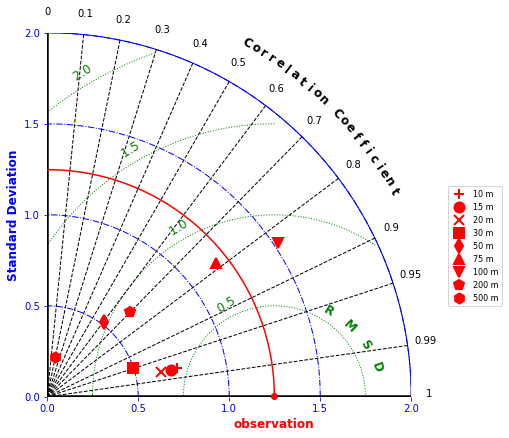

In [37]:
#label = {'10 m':'r','15 m':'b','20 m':'g','30 m':'k','50 m':'m','75 m':'k',
#       '100 m':'r','200 m':'b','500 m':'g'}
label = ['1','10 m','15 m','20 m','30 m','50 m','75 m','100 m','200 m','500 m']
fig = plt.figure(figsize=(7,7))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel = label,
                      markerlabelColor = label,# markercolor='lime',
                       markerLegend = 'on', 
                      colRMS = 'g', styleRMS = ':', widthRMS = 1.0, 
                      titleRMS = 'on', titleRMSDangle =40.0, 
                       colSTD = 'b', styleSTD = '-.', 
                      widthSTD = 1.0, titleSTD = 'on', 
                      colCOR = 'k', styleCOR = '--', widthCOR = 1.0, 
                  styleOBS = '-', 
                      colOBS = 'r', markerobs = 'o', 
                      titleOBS = 'observation',
                      titleCOR = 'on')
#['r','b','g','r','b','g','r','b','g','k']
#tickRMS = np.linspace(0,2,3), tickSTD = np.linspace(0,1,3),axismax = 1,
plt.tight_layout()
#plt.savefig('Taylor.pdf')

In [23]:
t_godas

<xarray.DataArray 'potdsl' (time: 60, lev: 100, lat: 1, lon: 1)>
array([[[[        nan]],

        [[28.79540405]],

        [[28.57795105]],

        ...,

        [[10.18360596]],

        [[10.15424805]],

        [[10.12489014]]],


       [[[        nan]],

        [[29.89559326]],

        [[29.82845459]],
...
        [[ 9.73135352]],

        [[ 9.69601294]],

        [[ 9.66067236]]],


       [[[        nan]],

        [[28.24147949]],

        [[28.24376831]],

        ...,

        [[ 9.68607764]],

        [[ 9.65171362]],

        [[ 9.61734961]]]])
Coordinates:
  * lon      (lon) float64 93.5
  * lat      (lat) float64 10.41
  * time     (time) datetime64[ns] 2012-03-01 2012-04-01 ... 2017-02-01
  * lev      (lev) int32 0 5 10 15 20 25 30 35 ... 465 470 475 480 485 490 495

In [75]:
np.linspace(0,0.5,3)

array([0.  , 0.25, 0.5 ])

In [1]:
import numpy as np
import xarray as xr
import bottleneck

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

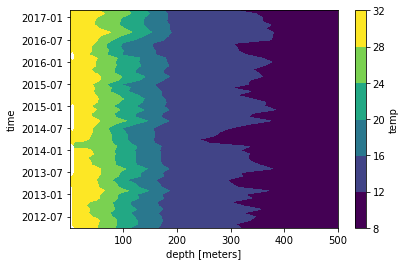

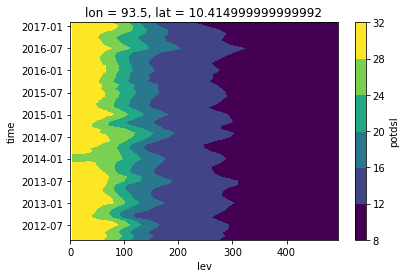

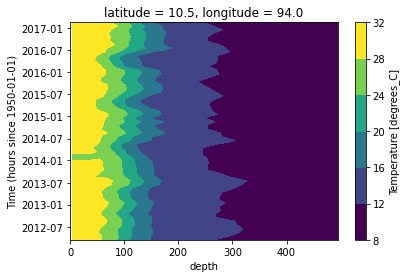

<xarray.DataArray 'temp' (time: 60, dep: 11)>
array([[        nan,         nan, 29.12650659, 29.07556935, 28.98587325,
        28.7470879 , 28.06486304, 25.70830538, 20.94851411, 13.30280484,
        10.02307863],
       [        nan, 30.160904  , 30.18957756, 30.09027377, 29.92673899,
        29.4809202 , 28.36312609, 25.90602925, 22.36445632, 13.3012256 ,
         9.73731542],
       [        nan, 29.78566529, 29.77449691, 29.76249261, 29.72288763,
        29.5350129 , 28.56294435, 25.96186008, 22.1872082 , 13.70833253,
         9.93627366],
       [        nan, 28.78806137, 28.77446111, 28.74863972, 28.70610375,
        28.53924   , 27.60639222, 24.67081583, 21.65933083, 13.67294417,
        10.23348875],
       [        nan, 28.55275309, 28.55048387, 28.54551747, 28.52878911,
        28.36915887, 26.89797366, 23.8722754 , 21.03959409, 13.29724153,
        10.13146304],
       [        nan, 28.48442673, 28.47996707, 28.47142742, 28.45052245,
        28.32995323, 27.4910711 , 25.20231331, 21.98744167, 13.91662473,
        10.2510871 ],
       [        nan, 28.00863987, 28.00827917, 28.01616014, 28.02766972,
        28.03268333, 27.54884569, 24.91799486, 21.13176764, 13.34039042,
...
        29.1922121 , 29.05083817, 28.08485941, 25.80241626, 14.83522285,
        10.11609973],
       [28.72840278, 28.73087056, 28.71740736, 28.70163847, 28.6889825 ,
        28.66941903, 28.39455889, 26.75897875, 24.27408569, 14.62673347,
         9.87698847],
       [28.8323453 , 28.80120054, 28.8133164 , 28.84414019, 28.85381075,
        28.74747755, 27.80495349, 25.83931183, 23.18053763, 14.77509435,
         9.99764556],
       [28.97424264, 28.94712194, 28.94143278, 28.91238611, 28.85142556,
        28.64144708, 27.89387556, 26.07673986, 23.38127708, 14.26416194,
         9.98776083],
       [28.44885067, 28.43127285, 28.4194207 , 28.41411559, 28.40869691,
        28.36751156, 28.03083884, 26.4029664 , 23.67512581, 14.39561008,
         9.86843737],
       [28.27174368, 28.27228911, 28.27028562, 28.27615632, 28.29037097,
        28.3374918 , 28.33805699, 27.77881331, 25.63254664, 13.95012863,
         9.96758992],
       [28.28902593, 28.29503333, 28.27780741, 28.27273333, 28.2711037 ,
        28.28167037, 28.15745556, 27.3087    , 25.15865185, 13.31274444,
         9.78065556]])
Coordinates:
  * time     (time) datetime64[ns] 2012-03-31 2012-04-30 ... 2017-02-28
  * dep      (dep) float64 1.0 5.0 10.0 15.0 20.0 ... 75.0 100.0 200.0 500.0

In [17]:
t_obs.plot.contourf()
plt.show()
t_godas[:,:,0,0].plot.contourf()
plt.show()
t_oras[:,:,0,0].plot.contourf()
plt.show()
t_obs

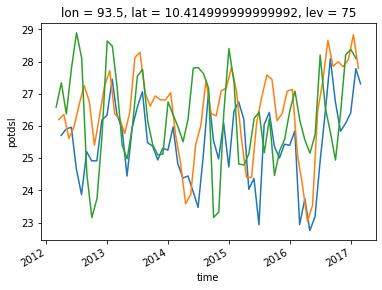

In [18]:
t_obs.sel(dep=75).plot()
t_oras.sel(depth=75).plot()
t_godas.sel(lev=75).plot()

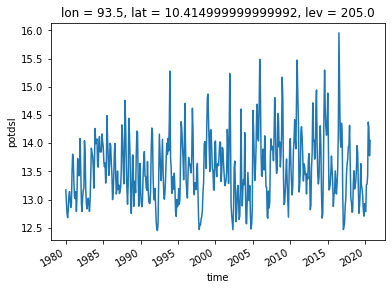

In [29]:
t_godas = t_god.potdsl.sel(lev=200,method='nearest') - 273.15
t_godas.plot()

In [7]:
bd12.temp

<xarray.DataArray 'temp' (time: 43179, dep: 11)>
[474969 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2012-03-01 ... 2017-02-02T02:00:00
  * dep      (dep) float64 1.0 5.0 10.0 15.0 20.0 ... 75.0 100.0 200.0 500.0
Attributes:
    long_name:  Temperature
    units:      deg C

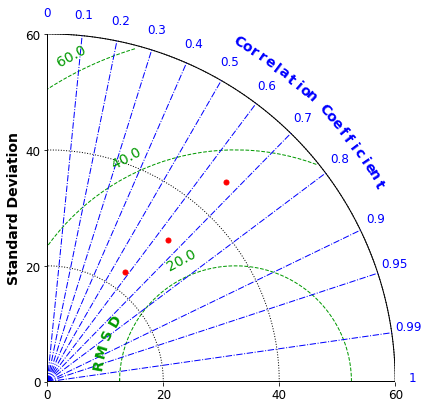

In [15]:
'''
How to create a simple Taylor diagram
A first example of how to create a simple Taylor diagram given one set of
reference observations and multiple model predictions for the quantity.
The Python code is kept to a minimum.
This example shows how to calculate the required statistics and produce
the Taylor diagram.
All functions in the Skill Metrics library are designed to only work with
one-dimensional arrays, e.g. time series of observations at a selected
location. The one-dimensional data are read in as dictionaries via a 
pickle file: ref['data'], pred1['data'], pred2['data'], 
and pred3['data']. The plot is written to a file in Portable Network 
Graphics (PNG) format.
The reference data used in this example are cell concentrations of a
phytoplankton collected from cruise surveys at selected locations and 
time. The model predictions are from three different simulations that
have been space-time interpolated to the location and time of the sample
collection. Details on the contents of the dictionary (once loaded) can 
be obtained by simply executing the following two statements
>> key_to_value_lengths = {k:len(v) for k, v in ref.items()}
>> print key_to_value_lengths
{'units': 6, 'longitude': 57, 'jday': 57, 'date': 57, 'depth': 57, 
'station': 57, 'time': 57, 'latitude': 57, 'data': 57}
Author: Peter A. Rochford
        Symplectic, LLC
        www.thesymplectic.com
Created on Dec 3, 2016
@author: prochford@thesymplectic.com
'''

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl3'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

class Container(object): 
    
    def __init__(self, pred1, pred2, pred3, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.pred3 = pred3
        self.ref = ref
        
if __name__ == '__main__':

    # Set the figure properties (optional)
    rcParams["figure.figsize"] = [8.0, 6.4]
    rcParams['lines.linewidth'] = 1 # line width for plots
    rcParams.update({'font.size': 12}) # font size of axes text
    
    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')

    # Read data from pickle file
    data = load_obj('taylor_data')

    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the 
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.pred1,data.ref,'data')
    taylor_stats2 = sm.taylor_statistics(data.pred2,data.ref,'data')
    taylor_stats3 = sm.taylor_statistics(data.pred3,data.ref,'data')
    
    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                     taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                      taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                      taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

    '''
    Produce the Taylor diagram
    Note that the first index corresponds to the reference series for 
    the diagram. For example sdev[0] is the standard deviation of the 
    reference series and sdev[1:4] are the standard deviations of the 
    other 3 series. The value of sdev[0] is used to define the origin 
    of the RMSD contours. The other values are used to plot the points 
    (total of 3) that appear in the diagram.
    For an exhaustive list of options to customize your diagram, 
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef)

    # Write plot to file
    plt.savefig('taylor1.png')

    # Show plot
    plt.show()



In [24]:
def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl3'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds
data = load_obj('taylor_data')
data.ref

{'data': array([ 42.5,   3. ,   3. ,   4. ,   0. ,  20. ,  30. ,   1. ,   0. ,
          0. ,   0. ,  36. ,  10. ,   4. ,   3. ,   0. ,   0. , 182. ,
          2. ,   2. ,   2. ,  64. ,   1. ,   1. ,   1. ,   5. ,   1. ,
          0. ,   4. ,   3. ,  62. ,   3. ,   2. , 140. ,   4. ,   5. ,
          1. ,  18. ,  19. ,  10. ,   0. ,  51. ,   7. ,   0. ,   0. ,
         50. ,  30. ,   0. ,   0. ,  39. ,  20. ,   0. ,   0. ,  23. ,
         28. ,   0. ,   0. ]),
 'date': [datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  datetime.date(2008, 5, 3),
  dat

In [1]:
!python -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu --service-id GLOBAL_REANALYSIS_PHY_001_030-TDS --product-id global-reanalysis-phy-001-030-monthly --longitude-min 94 --longitude-max 94 --latitude-min 10.5 --latitude-max 10.5 --date-min "1993-01-16 12:00:00" --date-max "2018-12-16 12:00:00" --depth-min 0.493 --depth-max 600 --variable thetao --variable so --out-dir ./ --out-name ts_oras5_1993_2018_BD12.nc --user ybadarvada --pwd kCb.3Fn5H4QS!XJ


2020-11-07 07:08:50.216 [ INFO] Asynchronous mode set
2020-11-07 07:08:50.229 [ INFO] Authenticating user ybadarvada for service http://my.cmems-du.eu/motu-web/Motu
2020-11-07 07:08:55.480 [ INFO] Requesting file to download (this can take a while)...
2020-11-07 07:08:57.179 [ INFO] Authenticating user ybadarvada for service http://my.cmems-du.eu/motu-web/Motu
2020-11-07 07:09:00.768 [ INFO] Product is not yet available (request in progress)
2020-11-07 07:09:10.769 [ INFO] Authenticating user ybadarvada for service http://my.cmems-du.eu/motu-web/Motu
2020-11-07 07:09:14.310 [ INFO] Product is not yet available (request in progress)
2020-11-07 07:09:24.311 [ INFO] Authenticating user ybadarvada for service http://my.cmems-du.eu/motu-web/Motu
2020-11-07 07:09:27.602 [ INFO] Product is not yet available (request in progress)
2020-11-07 07:09:37.603 [ INFO] Authenticating user ybadarvada for service http://my.cmems-du.eu/motu-web/Motu
2020-11-07 07:09:41.110 [ INFO] Product is not yet avai

In [29]:
!./name.sh

Bash version 4.4.20(1)-release...
Looping ... number 1993
Looping ... number 1994
Looping ... number 1995
Looping ... number 1996
Looping ... number 1997
Looping ... number 1998
Looping ... number 1999
Looping ... number 2000
Looping ... number 2001
Looping ... number 2002
Looping ... number 2003
Looping ... number 2004
Looping ... number 2005
Looping ... number 2006
Looping ... number 2007
Looping ... number 2008
Looping ... number 2009
Looping ... number 2010
Looping ... number 2011
Looping ... number 2012
Looping ... number 2013
Looping ... number 2014
Looping ... number 2015
Looping ... number 2016
Looping ... number 2017
Looping ... number 2018
